# Consulting Project: TechMart Inventory Optimization

Management Science - E-commerce Inventory Management

# Client Briefing: TechMart Electronics

## Meet Your Client

-   **Industry:** E-commerce / Electronics Retail
-   **Client Contact:** Yola Wang, Chief Operations Officer
-   **Company Size:** 200 employees
-   **Market:** Consumer electronics in Germany

## The COO’s Inventory Crisis

**Yola Wang, COO of TechMart**

*“We’re drowning in inventory but constantly out of stock on
bestsellers. It makes no sense!*

*Here’s our situation: We sell 30 electronics SKUs online: smartphones,
laptops, headphones, smartwatches, tablets. We have two warehouses:*

-   *Fast Warehouse (Hamburg): Right next to our shipping hub. Orders
    ship in 1-2 hours. But it’s small and has only 8,000 unit capacity.*
-   *Large Warehouse (Poland): Huge storage (50,000+ capacity) but
    orders take 2-3 days to ship from there.*

*The problem? We’re making terrible allocation decisions:*

-   *Slow-movers occupy 40% of fast warehouse space*
-   *Shipping delays costing us hundreds of thousands annually in
    customer refunds*
-   *Customer complaints about “2-day delivery” are up 60%*

*Black Friday is in 3 weeks. Last year was a disaster… We ran out of top
items in the fast warehouse on Day 1, then spent a week scrambling with
slow shipping from Poland. Lost a lot of potential revenue.*

*Here’s the critical constraint: Once Black Friday starts, we CANNOT
refill the Hamburg warehouse. All our warehouse staff are 100% busy
picking and packing orders and there’s zero time for restocking.
Whatever allocation we make beforehand is what we’re stuck with for the
entire weeks!*

*I need you to:*

1.  *Forecast Black Friday demand for each SKU (weeks 47-48)*
2.  *Decide which SKUs (and how many units) to pre-position in the fast
    warehouse (limited to 8,000 units!)*
3.  *Minimize shipping delay costs*
4.  *Show me the business impact in €€€*

*I have 3 years of sales history. Can you help us get this right before
Black Friday?“*

## The Business Context

### Warehouse System

#### Fast Warehouse (Hamburg)

-   **Capacity:** 8,000 units total
-   **Shipping speed:** 1-2 hours processing, next-day delivery
-   **Storage cost:** €2.50 per unit (for Black Friday period)
-   **Perfect for:** High-demand, fast-moving items

#### Large Warehouse (Poland)

-   **Capacity:** 50,000+ units (effectively unlimited for our needs)
-   **Shipping speed:** 2-3 days processing, 2-3 days delivery (4-6 days
    total!)
-   **Storage cost:** €0.80 per unit (for Black Friday period)
-   **Perfect for:** Slow-movers, bulk storage

### The Allocation Problem

**Before Black Friday:**

You must decide **how many units of each SKU** to pre-position in the
fast warehouse (Hamburg) vs. large warehouse (Poland).

**Critical Constraints:**

-   Total units in fast warehouse ≤ 8,000
-   **No refilling during Black Friday!** All warehouse staff are busy
    handling the surge, whatever you allocate is fixed for the entire
    weekend

**During Black Friday:**

-   **Units in Fast Warehouse (Hamburg):** Ship quickly (1-2 days),
    customers happy, **no delay penalty**
-   **Units in Large Warehouse (Poland):** Ship slowly (4-6 days),
    customers complain, **delay penalty applies**

**Your Goal:** Decide how many units of each SKU go in Hamburg warehouse
to minimize total delay penalty costs. *Note: While storage costs
differ, Yola cares most about customer satisfaction. Minimize the delay
penalties first.*

> **Note**
>
> Note, we have sufficient total inventory of each SKU. The question is
> **WHERE to store each unit** before Black Friday!

> **Tip**
>
> **Example Allocation:**
>
>     SKU-001: 450 units in Hamburg, rest in Poland
>     SKU-002: 380 units in Hamburg, rest in Poland
>     SKU-003: 0 units in Hamburg, all in Poland
>     ...
>     SKU-030: 200 units in Hamburg, rest in Poland
>     Total: ≤ 8,000 units in Hamburg

### Cost Structure

**Delay Penalty (per unit from Poland warehouse):**

-   15% of customers cancel order: lost sale (50 % of product price as
    opportunity costs)
-   85% of customers wait but demand partial refund: €10 compensation

### Customer Expectations

-   **High-demand items:** Customers expect 1-2 day delivery (Hamburg
    warehouse)
-   **Low-demand items:** Customers more tolerant of 4-6 day delivery
    (Poland warehouse)
-   **Black Friday:** Everyone expects fast delivery! High delay costs
    for all SKUs.

## The Data: 3 Years of Sales History

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(2025)

def generate_techmart_sales_history():
    """
    Generate 3 years of sales history for 30 electronics SKUs.
    """

    # Define 30 SKUs across 5 categories with category-specific trends
    # Trend: annual growth/decline rate (e.g., 0.05 = 5% growth per year)
    categories = {
        'Smartphones': {'count': 8, 'trend': -0.15},  # Mature market, slight decline
        'Laptops': {'count': 6, 'trend': 0.11},       # Stable with slight growth
        'Headphones': {'count': 6, 'trend': 0.18},    # Growing premium audio market
        'Smartwatches': {'count': 5, 'trend': 0.22},  # Emerging category, strong growth
        'Tablets': {'count': 5, 'trend': -0.15}       # Declining market
    }

    skus = []
    sku_id = 1
    for category, cat_info in categories.items():
        count = cat_info['count']
        category_trend = cat_info['trend']

        for i in range(count):
            # Each product has unique characteristics
            if category == 'Smartphones':
                base_demand = np.random.uniform(100, 410)
            elif category == 'Laptops':
                base_demand = np.random.uniform(90, 220)
            elif category == 'Headphones':
                base_demand = np.random.uniform(20, 210)
            elif category == 'Smartwatches':
                base_demand = np.random.uniform(20, 140)
            elif category == 'Tablets':
                base_demand = np.random.uniform(80, 170)

            # Seasonal strength: how much seasonality affects this product (0.1-0.3)
            seasonal_strength = np.random.uniform(0.1, 0.3)

            # Noise level: product-specific volatility (std: 0.08-0.20)
            noise_std = np.random.uniform(0.03, 0.25)

            # Black Friday boost: product-specific multiplier (1.1-1.5)
            bf_multiplier = np.random.uniform(1.1, 1.5)

            skus.append({
                'sku_id': f'SKU-{sku_id:03d}',
                'category': category,
                'base_demand': base_demand,
                'seasonal_strength': seasonal_strength,
                'noise_std': noise_std,
                'bf_multiplier': bf_multiplier,
                'category_trend': category_trend,
                'price': np.random.uniform(30, 1200)
            })
            sku_id += 1

    skus_df = pd.DataFrame(skus)

    # Generate weekly sales from 2023-01-01 to 2025-11-15 (almost 3 years)
    start_date = datetime(2023, 1, 1)
    end_date = datetime(2025, 11, 15)
    weeks = pd.date_range(start_date, end_date, freq='W')

    sales_data = []

    for _, sku in skus_df.iterrows():
        for week_start in weeks:
            week_num = week_start.isocalendar()[1]
            year = week_start.year
            month = week_start.month

            # Base demand (unique per product)
            demand = sku['base_demand']

            # Component 1: Category-specific trend (small, linear over time)
            # Calculate years elapsed from start date (2023-01-01)
            years_elapsed = (week_start - start_date).days / 365.25
            trend_multiplier = 1.0 + (sku['category_trend'] * years_elapsed)
            demand *= trend_multiplier

            # Component 2: Annual cycle (52 weeks) - peak in Nov/Dec (Q4), trough in summer (Q3)
            annual_seasonality = 1.0 + sku['seasonal_strength'] * np.cos(2 * np.pi * (week_num - 47) / 52)

            # Component 3: Quarterly cycle (13 weeks) - shorter-term fluctuations
            quarterly_seasonality = 1.0 + (sku['seasonal_strength'] * 0.5) * np.sin(2 * np.pi * week_num / 13)

            demand *= annual_seasonality * quarterly_seasonality

            # Black Friday boost (product-specific multiplier)
            if week_num in [47, 48]:
                demand *= sku['bf_multiplier']

            # Add normally distributed random noise (product-specific volatility)
            noise = np.random.normal(1.0, sku['noise_std'])
            demand *= max(0.5, min(1.5, noise))  # Clip to reasonable range

            # Round to integer
            demand = max(0, int(demand))

            sales_data.append({
                'sku_id': sku['sku_id'],
                'week_start': week_start,
                'year': year,
                'week': week_num,
                'month': month,
                'units_sold': demand
            })

    sales_df = pd.DataFrame(sales_data)

    return skus_df, sales_df

# Generate data
skus_df, sales_df = generate_techmart_sales_history()

print("TECHMART ELECTRONICS - SKU CATALOG")
print("=" * 120)
print(skus_df.to_string(index=False))
print("\n" + "=" * 120)
print(f"Total SKUs: {len(skus_df)}")
print("\nBy category:")
for category in skus_df['category'].unique():
    count = len(skus_df[skus_df['category'] == category])
    print(f"  {category}: {count} SKUs")

TECHMART ELECTRONICS - SKU CATALOG
 sku_id     category  base_demand  seasonal_strength  noise_std  bf_multiplier  category_trend       price
SKU-001  Smartphones   142.001331           0.277570   0.235173       1.278227           -0.15  484.235589
SKU-002  Smartphones   179.854895           0.231474   0.138376       1.485695           -0.15  967.151836
SKU-003  Smartphones   241.113638           0.260212   0.039178       1.407783           -0.15   33.710207
SKU-004  Smartphones   190.770912           0.222183   0.230866       1.220046           -0.15  320.860405
SKU-005  Smartphones   306.581553           0.297507   0.133019       1.149315           -0.15 1101.756722
SKU-006  Smartphones   393.304495           0.155539   0.144324       1.161898           -0.15   47.114003
SKU-007  Smartphones   200.515394           0.298180   0.142891       1.450598           -0.15  108.853024
SKU-008  Smartphones   188.087659           0.193780   0.197590       1.469045           -0.15  489.837796
SK

### Sales History Overview

In [2]:
print("\nSALES HISTORY SUMMARY")
print("=" * 80)
print(f"Date range: {sales_df['week_start'].min().date()} to {sales_df['week_start'].max().date()}")
print(f"Total weeks: {sales_df['week_start'].nunique()}")
print(f"Total records: {len(sales_df):,}")
print(f"Total units sold (3 years): {sales_df['units_sold'].sum():,}")

# Show sample of sales data
print("\nSample sales data (first 20 records):")
print(sales_df.head(20).to_string(index=False))


SALES HISTORY SUMMARY
Date range: 2023-01-01 to 2025-11-09
Total weeks: 150
Total records: 4,500
Total units sold (3 years): 674,482

Sample sales data (first 20 records):
 sku_id week_start  year  week  month  units_sold
SKU-001 2023-01-01  2023    52      1         233
SKU-001 2023-01-08  2023     1      1         255
SKU-001 2023-01-15  2023     2      1         158
SKU-001 2023-01-22  2023     3      1         221
SKU-001 2023-01-29  2023     4      1         202
SKU-001 2023-02-05  2023     5      2         150
SKU-001 2023-02-12  2023     6      2         146
SKU-001 2023-02-19  2023     7      2         173
SKU-001 2023-02-26  2023     8      2          78
SKU-001 2023-03-05  2023     9      3         138
SKU-001 2023-03-12  2023    10      3         143
SKU-001 2023-03-19  2023    11      3          93
SKU-001 2023-03-26  2023    12      3         150
SKU-001 2023-04-02  2023    13      4         136
SKU-001 2023-04-09  2023    14      4         148
SKU-001 2023-04-16  2023   

## Warehouse Capacity Analysis

In [3]:
# Analyze capacity feasibility
warehouses = {
    'Fast Warehouse (Hamburg)': {
        'capacity': 8000,  # units
        'description': 'Premium location, fast shipping, limited space'
    },
    'Large Warehouse (Poland)': {
        'capacity': 100000,  # 50000 units (effectively unlimited)
        'description': 'Cheap storage, slow shipping, huge space'
    }
}

print("\nWAREHOUSE SPECIFICATIONS")
print("=" * 80)
for warehouse, specs in warehouses.items():
    print(f"\n{warehouse}:")
    for key, value in specs.items():
        if key != 'description':
            print(f"  {key}: {value}")
    print(f"  → {specs['description']}")

print("\n" + "=" * 80)
print("KEY CONSTRAINT: Fast warehouse can only hold 8,000 units total!")
print("\nALLOCATION DECISION:")
print("  - You must forecast Black Friday demand for each SKU")
print("  - Then decide which SKUs to store in fast warehouse")
print("  - Goal: Minimize total delay costs!")


WAREHOUSE SPECIFICATIONS

Fast Warehouse (Hamburg):
  capacity: 8000
  → Premium location, fast shipping, limited space

Large Warehouse (Poland):
  capacity: 100000
  → Cheap storage, slow shipping, huge space

KEY CONSTRAINT: Fast warehouse can only hold 8,000 units total!

ALLOCATION DECISION:
  - You must forecast Black Friday demand for each SKU
  - Then decide which SKUs to store in fast warehouse
  - Goal: Minimize total delay costs!

## Minimal Helper Functions

We provide only basic data access and cost calculation functions. **You
must implement forecasting, optimization, and simulation yourself.**

In [4]:
def get_sku_sales_history(sku_id, sales_df):
    """
    Get sales history for a specific SKU.

    Args:
        sku_id: SKU identifier (e.g., 'SKU-001')
        sales_df: DataFrame with sales history

    Returns:
        DataFrame with weekly sales for the SKU
    """
    return sales_df[sales_df['sku_id'] == sku_id].sort_values('week_start').reset_index(drop=True)

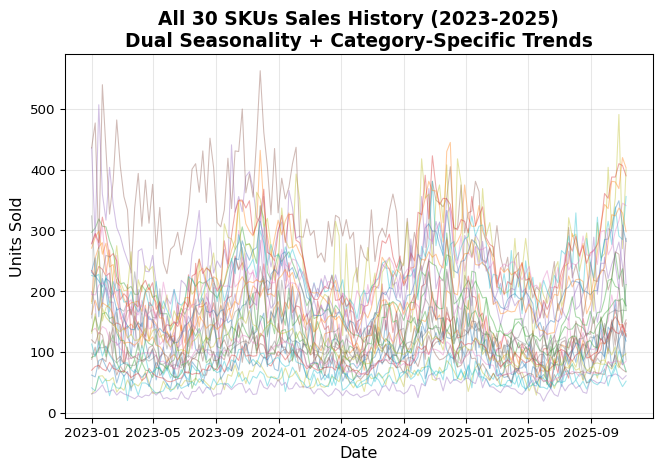

In [5]:
def plot_sku_sales_trend(sku_id, sales_df, skus_df):
    """Plot sales trend for a specific SKU."""
    sku_history = get_sku_sales_history(sku_id, sales_df)
    sku_info = skus_df[skus_df['sku_id'] == sku_id].iloc[0]

    plt.figure(figsize=(14, 5))
    plt.plot(sku_history['week_start'], sku_history['units_sold'], linewidth=1.5)
    plt.axhline(y=sku_info['base_demand'], color='red', linestyle='--',
                label=f'Base Demand: {sku_info["base_demand"]}', alpha=0.7)

    # Highlight Black Friday weeks
    bf_weeks = sku_history[sku_history['week'].isin([47, 48])]
    plt.scatter(bf_weeks['week_start'], bf_weeks['units_sold'],
                color='orange', s=100, zorder=5, label='Black Friday')

    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Units Sold', fontsize=12)
    plt.title(f'{sku_id} Sales History - {sku_info["category"]} (Base: {sku_info["base_demand"]} units/week)',
              fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot all SKUs together to visualize the dual seasonality pattern
plt.figure()

for sku_id in skus_df['sku_id']:
    sku_history = get_sku_sales_history(sku_id, sales_df)
    sku_info = skus_df[skus_df['sku_id'] == sku_id].iloc[0]
    plt.plot(sku_history['week_start'], sku_history['units_sold'],
            alpha=0.4, linewidth=0.8)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.title('All 30 SKUs Sales History (2023-2025)\nDual Seasonality + Category-Specific Trends',
         fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Your Task

You must develop an inventory optimization solution that forecasts Black
Friday demand and optimally allocates SKUs to warehouses. Provide:

### 1. Jupyter Notebook with Complete Solution

Your notebook should include:

-   **Exploratory Data Analysis:**

    -   Seasonality patterns (visualize aggregate sales over time)
    -   Product lifecycle trends
    -   Black Friday spike analysis (2023 vs 2024)
    -   SKU categorization (fast-movers vs. slow-movers)

-   **Demand Forecasting:**

    -   Forecast Black Friday 2025 demand (weeks 47-48 combined) for all
        30 SKUs
    -   Report forecast accuracy metrics (MAE, RMSE, or MAPE)

-   **Inventory Allocation Optimization:**

    -   Decision: **How many units of each SKU** to allocate to Hamburg
        warehouse (total ≤ 8,000 units!)
    -   Objective: Minimize total delay cost

-   **Monte Carlo Simulation:**

    -   Generate 10,000 demand scenarios from your forecast with a
        variation defined by you
    -   For each scenario, calculate total delay cost using your fixed
        allocation
    -   Analyze: Mean cost, standard deviation, 95th percentile
        (worst-case)
    -   Insight: How robust is your allocation to forecast errors?

-   **Results & Business Impact:**

    -   Total expected delay cost
    -   Allocation breakdown: How many units of each SKU in Hamburg
        vs. Poland
    -   Comparison to baseline (e.g., equal allocation across all SKUs,
        or random)
    -   Cost savings in €€€

> **Note**
>
> I won’t judge the code quality in this notebook. It’s just for me to
> review your final solution and identify any mistakes if your results
> seem unrealistic. The final project will be graded primarily based on
> your presentation and the results you have achieved.

### 2. Presentation

-   **Problem understanding:** Yola’s crisis in your own words
-   **Your approach:** Forecasting method + allocation logic
-   **Results:** Forecasts, allocation decision, Monte Carlo analysis
-   **Business impact:** savings, recommendations, trade-offs,
    limitations

> **Note**
>
> Please upload both, presentation and jupyter notebook (or `.py` files)
> for the final project.

### 3. Key Metrics to Report

-   Forecasting: Forecast accuracy and forecasted demand for 2025 Black
    Friday
-   Allocation: Total units allocated to fast warehouse (must be ≤
    8,000!)
-   Expected cost: Total delay Costs based on allocation decision
-   Monte Carlo Risk Analysis: Report all important metrics (your
    choice) and 95th percentile cost
-   Business Impact: Cost savings vs. baseline allocation

## Constraints and Requirements

> **Important**
>
> **Hard Constraints (Must Satisfy)**
>
> 1.  **Capacity:** Total forecasted demand allocated to fast warehouse
>     ≤ 8,000 units
>
> **Soft Constraints (Optimize)**
>
> 1.  **Minimize delay costs:** Fewer units in Poland = lower total cost
> 2.  **Robustness:** Allocation should perform reasonably under demand
>     uncertainty (Monte Carlo)

## Tips for Success

1.  **No refilling during Black Friday!** Your allocation is fixed for
    the entire weekend.
2.  **Forecasting is critical:** A 10% forecast error can shift which
    SKUs get priority.
3.  **Monte Carlo reveals risk:** Your allocation might have same
    expected cost but higher variance.
4.  **Start simple, iterate:** Get a working forecast → simple
    allocation → validate → Monte Carlo

## Common Pitfalls to Avoid

-   **Overfitting forecast:** Don’t overfit to historical data. Use
    simple, robust methods.
-   **Ignoring capacity:** Double-check that total allocated to fast
    warehouse ≤ 8,000!
-   **Poor visualization:** Make your allocation decision clear (how
    many units of each SKU where?)
-   **No baseline comparison:** Always compare to a baseline (e.g.,
    random allocation) to show improvement

## Data Access

All data is provided in this notebook:

-   `skus_df`: DataFrame with 30 SKUs and their attributes
-   `sales_df`: DataFrame with 3 years of weekly sales history
-   `warehouses`: Dict with warehouse specifications
-   Helper functions: `get_sku_sales_history()`,
    `plot_sku_sales_trend()`

**You must implement forecasting, allocation optimization, and Monte
Carlo simulation yourself!**

## Deadline

-   **Notebook submission & Presentation:** Lecture 12
-   **Good luck, consultants!**